<a href="https://www.kaggle.com/code/tiffiw/learn-uk-from-chatgpt-ultimate-basic-plot-guide?scriptVersionId=128772510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Objective 
1. Build a better intuition of plotting by using mainly Matplotlib
2. Learn something about UK

# Rules
1. **Storyline**: Tell a story by using the most common charts. Focus on the learning build up.
2. **Matplotlib**: Start with Matplotlib to achieve the figure first. If the code starts to get too complicated, you can use alternatives to achieve it in a simpler approach.
3. **ChatGPT**: I do ask ChatGPT a lot. Note down what's new that you learn from ChatGPT

# Outline

## Preparation
1. Transform Data

2. Area categories
   - ChatGPT - Great Britain does not include Northern Ireland

## Let's Plot
1. Median Salary of each London Borough from 1999-2019 (**Subplot**)

2. Median Salary of London Boroughs vs London vs UK (**Line Chart**)
    - ChatGPT - The high demand for skilled workers drives up salaries in these areas (City of London and Tower Hamlets)
   
   
3. London Salary Ranking by Borough & Salary Growth Rate (**Bar Chart**)
    - ChatGPT - Introduction of the National Living Wage (NLW) in April 2016
    


4. Salary & Life Satisfaction (**Scatter & Bubble Chart**)

5. Salary & Life Satisfaction & Numbers of Jobs (**Heatmap**)

6. Inner London vs Outer London (**Pie Chart**)


    


# Preparation

In [1]:
## load library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

## load data - we only use yearly data
df_y = pd.read_csv('../input/housing-in-london/housing_in_london_yearly_variables.csv')
df_y.head()


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


## 1. Transform Data
- **area_size** - same area should have the same area size throughout the dataset. 
- **data** - convert it into YYYY format as we only have year data

In [2]:
# Area size 
area_size = df_y.groupby('area')['area_size'].max().to_dict()
df_y['area_size'] = df_y['area_size'].fillna(df_y['area'].map(area_size))

# Data
df_y['date'] = df_y['date'].str.slice(start=0, stop=4)
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
code                 1071 non-null object
area                 1071 non-null object
date                 1071 non-null object
median_salary        1049 non-null float64
life_satisfaction    352 non-null float64
mean_salary          1071 non-null object
recycling_pct        860 non-null object
population_size      1018 non-null float64
number_of_jobs       931 non-null float64
area_size            777 non-null float64
no_of_houses         666 non-null float64
borough_flag         1071 non-null int64
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


## 2. Area categories
There are not just London boroughs but also higher hierarchical area data, such as 'England' or 'Great Britain'. As I have no idea which ones are related London, I asked ChatGPT to help me identify the categories.

In [3]:
## All the area in the dataset
all_area= list(set(df_y['area']))

london_borough = ['city of london','barking and dagenham',
               'barnet','bexley','brent'
 ,'bromley','camden','croydon','ealing','enfield','greenwich','hackney'
 ,'hammersmith and fulham', 'haringey', 'harrow', 'havering', 'hillingdon'
 ,'hounslow' ,'islington' ,'kensington and chelsea' ,'kingston upon thames'
 ,'lambeth' ,'lewisham' ,'merton' ,'newham' ,'redbridge' ,'richmond upon thames'
 ,'southwark' ,'sutton' ,'tower hamlets' ,'waltham forest' ,'wandsworth'
 ,'westminster']

inner_london_boroughs = ['camden', 'greenwich', 'hackney', 'hammersmith and fulham', 'islington', 'kensington and chelsea', 'lambeth', 'lewisham', 'southwark', 'tower hamlets', 'wandsworth', 'westminster']
outer_london_boroughs = ['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley', 'croydon', 'ealing', 'enfield', 'greenwich', 'harrow', 'havering', 'hillingdon', 'hounslow', 'kingston upon thames', 'merton', 'newham', 'redbridge', 'richmond upon thames', 'sutton', 'tower hamlets', 'waltham forest', 'wandsworth']
countries = ['england','northern ireland', 'scotland', 'wales']
england = ['north east','north west', 'yorkshire and the humber', 'east midlands','west midlands', 'east', 'london', 'south east', 'south west']
others = ['inner london','outer london', 'united kingdom', 'great britain','england and wales']


### ChatGPT - Great Britain does not include Northern Ireland

- Question: What are the difference between "United Kingdom" and "Great Britain" ?

- ChatGPT: "United Kingdom" and "Great Britain" are often used interchangeably, but they actually refer to different things.

    The United Kingdom (UK) is a sovereign country that includes England, Scotland, Wales, and Northern Ireland.

    **Great Britain** refers to the largest island in the British Isles, which includes **England, Scotland, and Wales**. So technically, **Great Britain does not include Northern Ireland, which is part of the island of Ireland**

    However, the term "Great Britain" is sometimes used to refer to the entire UK, especially in contexts where the distinction between the UK and its constituent countries is not relevant.

# Let's Plot

## 1. Median Salary of each London Borough from 1999-2019 (Subplot)

I want to have an overlook of the salary trends over years for all the 33 london boroughs including 'City of London', so that I can have a quick grasp. **Subplots** with the most basic **line chart (plt.plot)** create a good outlook for this goal.


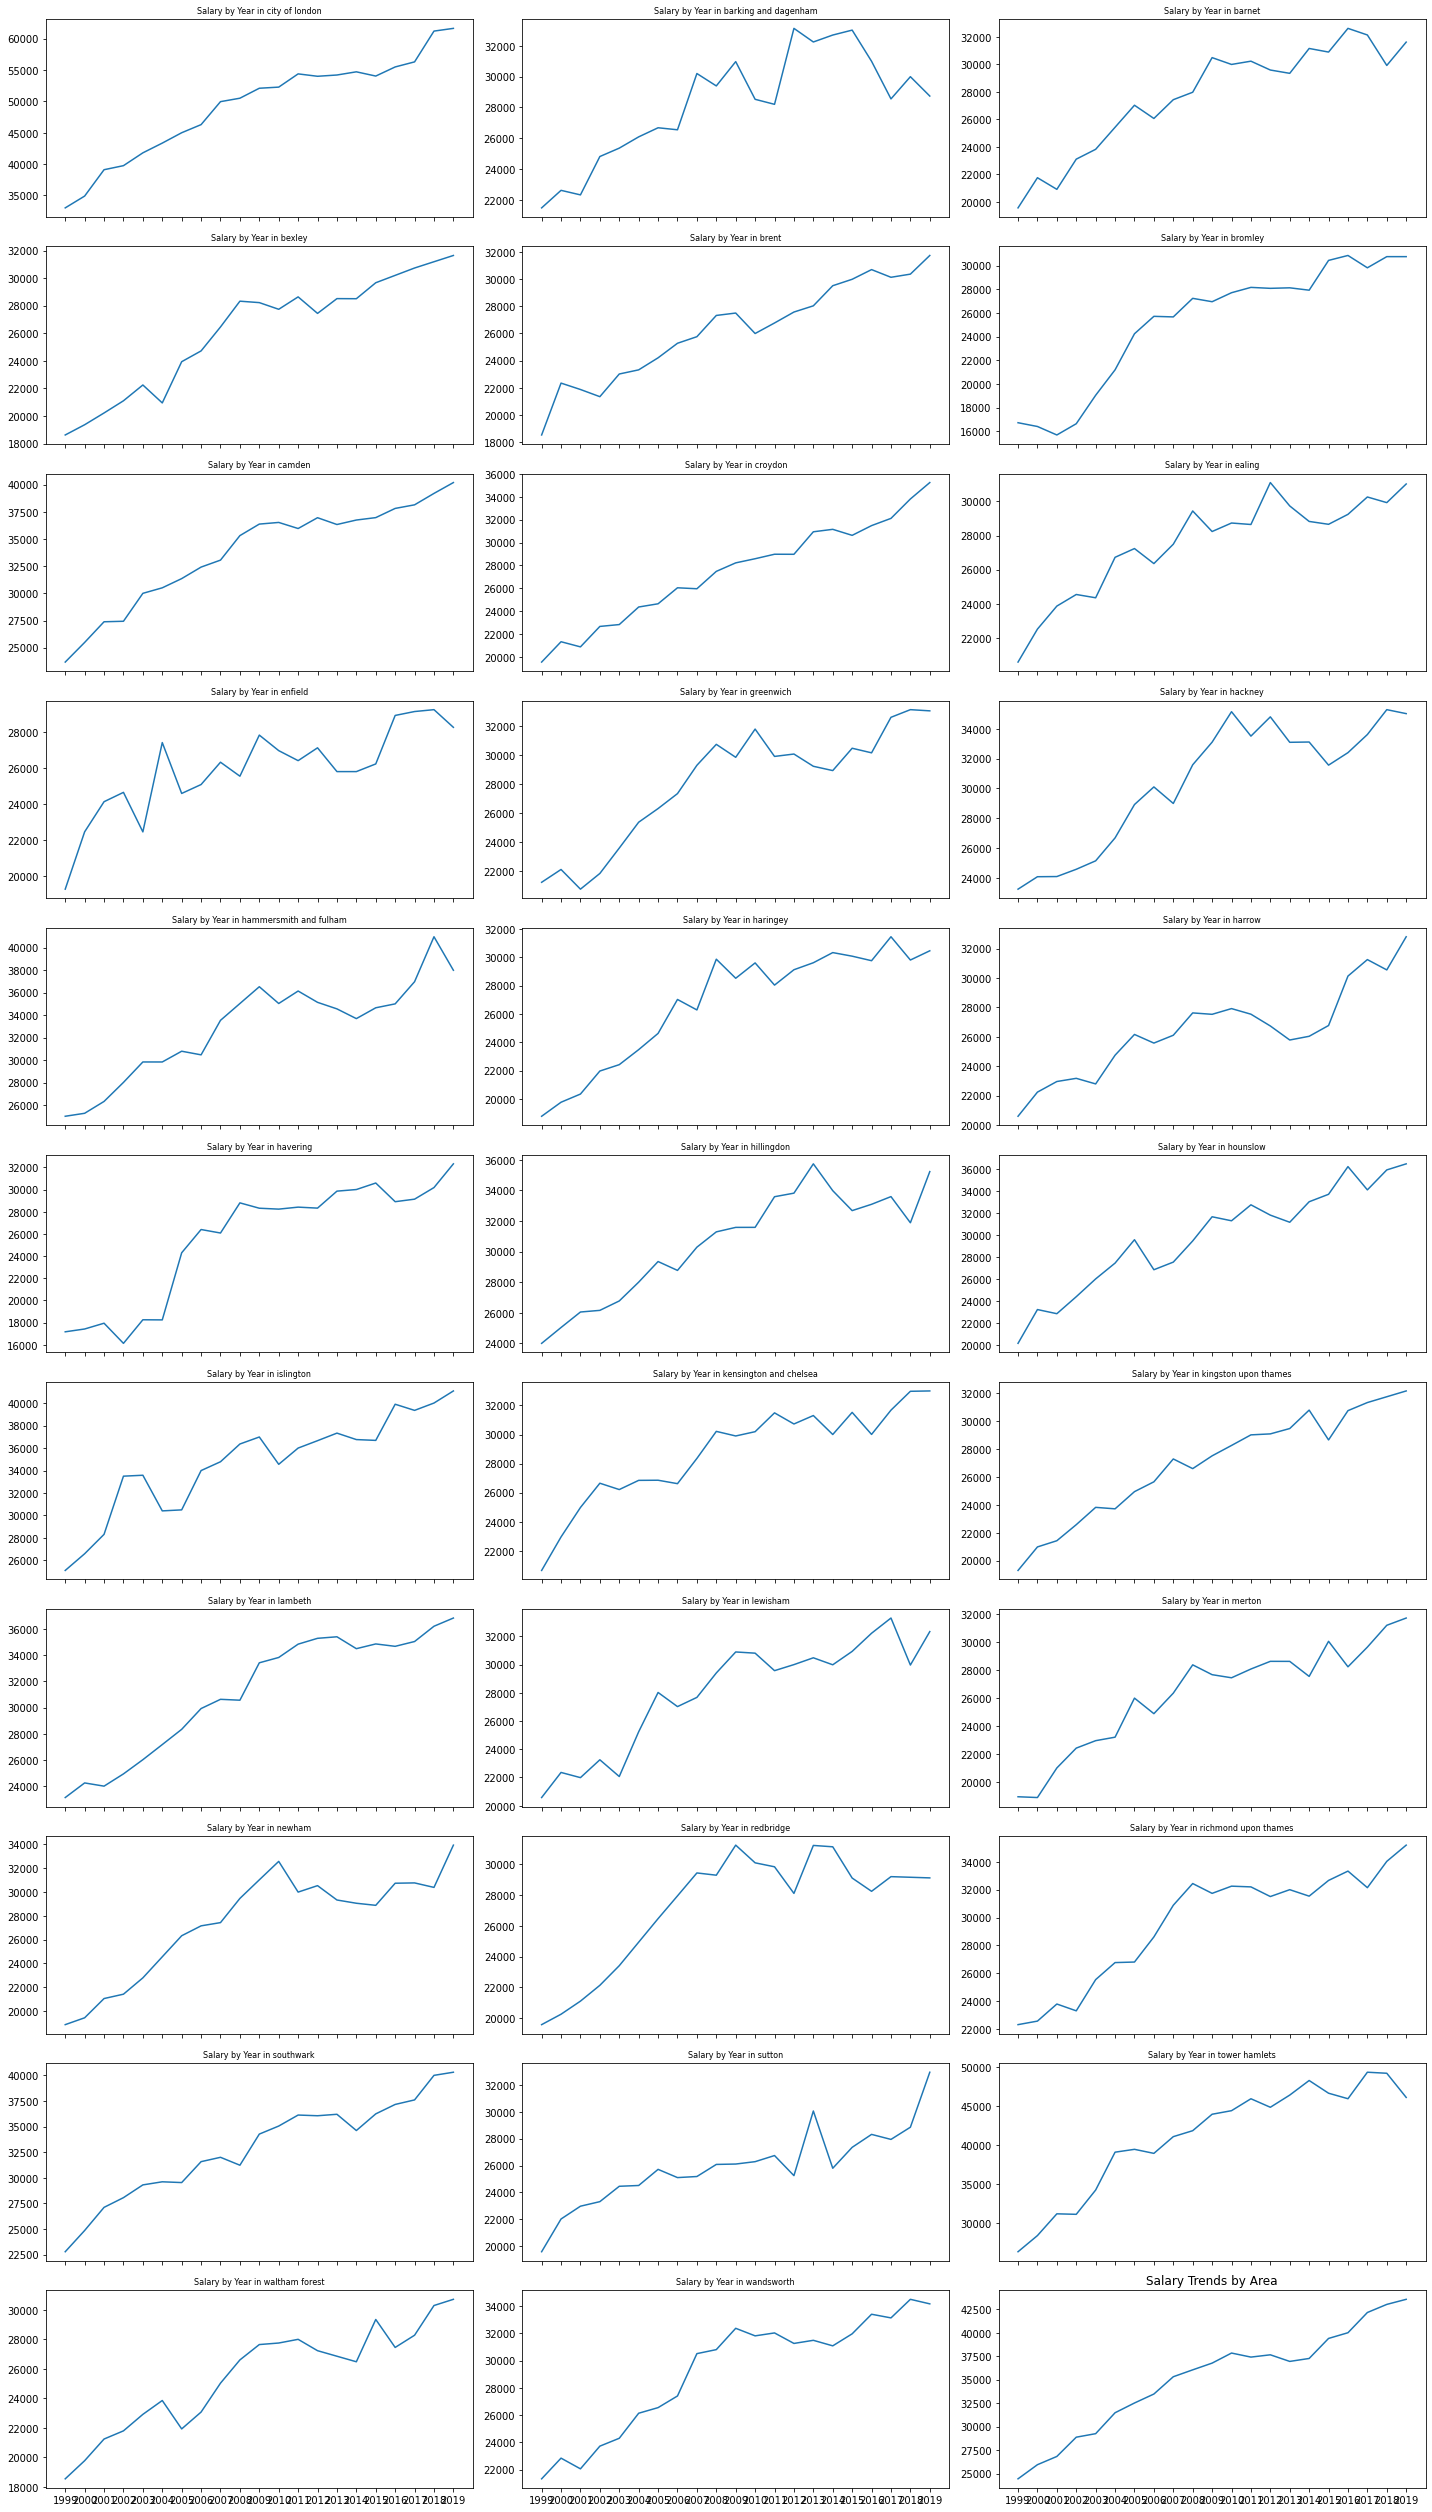

In [4]:
fig, axs = plt.subplots(11, 3, figsize=(20, 35), sharex=True)

# loop over the subplots and plot a line for each area
for i, area in enumerate(london_borough):
    # Filter the data for the current area
    data = df_y[df_y['area'] == area]
    data = data.interpolate(method='linear') ##connect the gap of the data

    # Compute the row and column indices for the current subplot
    row_idx = i // 3
    col_idx = i % 3
    axs[row_idx, col_idx].plot(data['date'], data['median_salary'])
    axs[row_idx, col_idx].set_title(f'Salary by Year in {area}',fontsize=8)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.title('Salary Trends by Area')
plt.show()

All we can see is salary grows overtime. It looks right, but doesn't mean much until we make comparison with each other, so here we introduce a muti-lines & area chart.

## 2. Median Salary of London Boroughs vs London vs UK (Line Chart)
To see mutiple lines plotted in the same figure, all you need to do is to plot each of the line into the figure. In the chart I include **The UK and London** data as comparison. By using different styles and adding areas to the line, it creates a contrast of the regional data and the local boroughs' data.

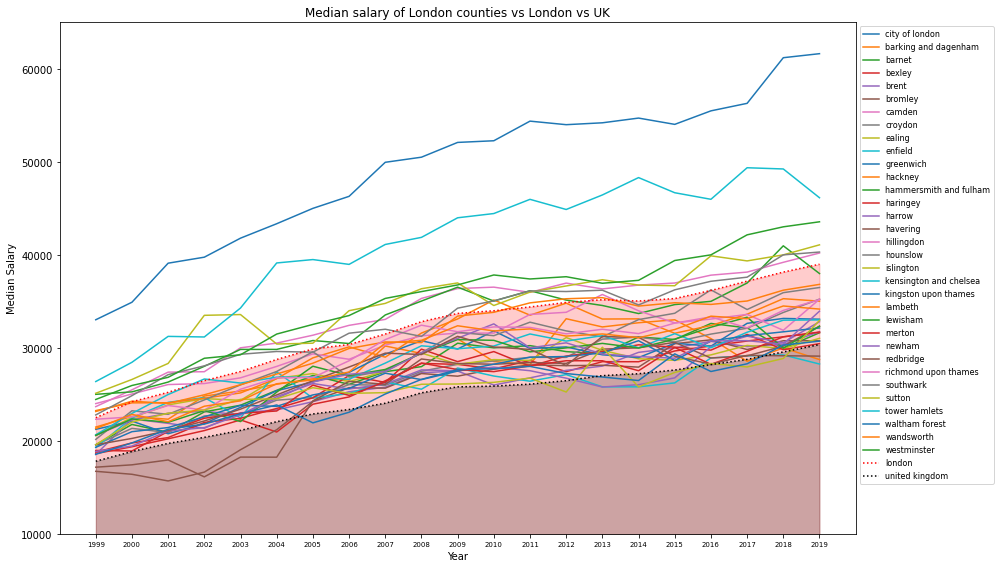

In [5]:
fig, axs = plt.subplots(figsize=(14, 8))

# Plot a line for each area
for area in london_borough:
    data = df_y[df_y['area'] == area]
    data = data.interpolate(method='linear') ##connect the gap of the data
    plt.plot(data['date'].str[:4], data['median_salary'], label=area)

benchmark = ['london', 'united kingdom']
color = ['red','black']
for area,c in zip(benchmark, color):
    data = df_y[df_y['area'] == area]
    data = data.interpolate(method='linear') ##connect the gap of the data
    plt.plot(data['date'].str[:4], data['median_salary'],linestyle='dotted',color=c, label=area)
    plt.fill_between(data['date'].str[:4], 0, data['median_salary'], color=c, alpha=0.2)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.ylim([10000, 65000])
plt.xticks(fontsize = 7)
plt.title('Median salary of London counties vs London vs UK')

# Add legend to the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize = 8)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**City of London and Tower Hamlets** have relativly high salary over times than all the others, much higher than average of London & the whole UK, although we still can't be quite sure because there are too many areas here and we can't see it clearly. 

At this point I'm very curious what are these 2 places. So I asked ChatGPT

### ChatGPT - The high demand for skilled workers drives up salaries in these areas.
- question: Why does City of London and Tower Hamlets have high salary?
- answer: **City of London and Tower Hamlets** are both areas that are highly developed and have a concentration of **high-paying jobs in sectors such as finance, business, and technology**. City of London is the financial center of London and the UK, hosting the headquarters of major banks and financial institutions, while Tower Hamlets has a large number of business and technology parks. The high demand for skilled workers in these industries drives up salaries in these areas. Additionally, these areas have a relatively high cost of living, which may also contribute to higher salaries.



## 3. London Salary Ranking by Borough & Salary Growth Rate (Bar Chart)



/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


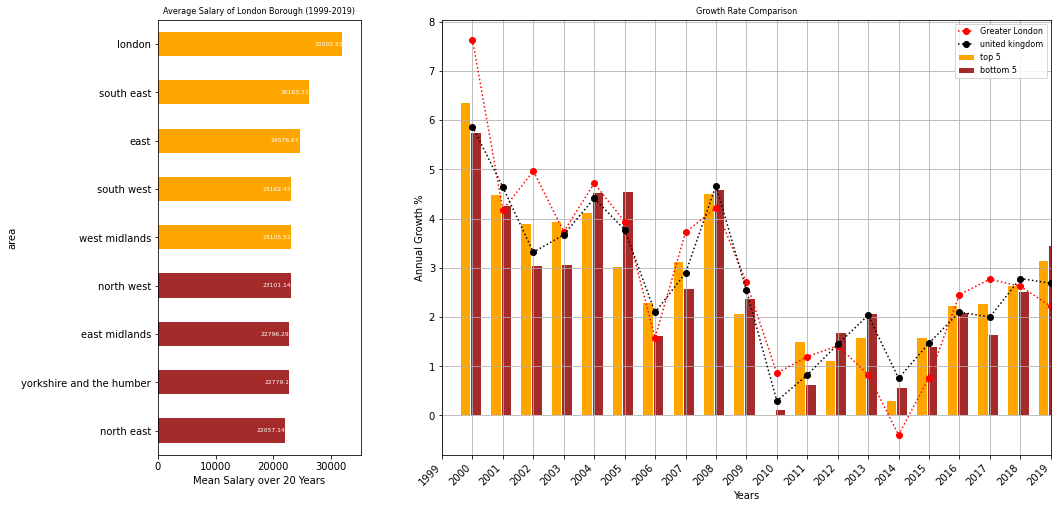

In [6]:
fig, axs = plt.subplots(1,2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 3]})
                                    
## Subplot 1
# create color gradient
cat = england
# pivot the dataset to prepare for plotting
data = df_y[df_y['area'].isin(cat)]
data0 = data.groupby('area').median_salary.mean().sort_values()
top_5 = data0.nlargest(5).index.to_list()
bottom_5 = data0.nsmallest(5).index.to_list()

color_dict = {}
label_dict = {}
# create a list of colors for each bar 
for borough in cat:
    if borough in top_5:
        color_dict[borough] = 'orange'
    elif borough in bottom_5:
        color_dict[borough] = 'brown'
    else:
        color_dict[borough] = 'grey'

# plot the bar chart with conditional colors
data0.plot(kind='barh', ax=axs[0], color=[color_dict[borough] for borough in data0.index])

# set the title and axis labels for the first subplot
axs[0].set_title('Average Salary of London Borough (1999-2019)',fontsize = 8)
axs[0].set_xlabel('Mean Salary over 20 Years')


# add text labels to the bars
for i, v in enumerate(data0.values):
    axs[0].text(v, i, str(round(v, 2)), ha='right', va='center', fontsize =6, color='w')
    
# set the x limits
axs[0].set_xlim([0, data0.max()*1.1])

##########################################################################################
## Subplot 2

# Prepare benchmark data
benchmark = ['london', 'united kingdom']

# pivot the dataset to prepare for plotting
data2 = df_y[df_y['area'].isin(benchmark)]
data2.loc[:, 'growth_rate'] = data2.groupby('area')['median_salary'].pct_change()*100
data2 = data2.pivot(index='date', columns='area', values='growth_rate')

# prepare top 5, bottom 5 data
data_top5 = df_y[df_y['area'].isin(top_5)].groupby('date').median_salary.mean().pct_change() * 100
data_bottom5 = df_y[df_y['area'].isin(bottom_5)].groupby('date').median_salary.mean().pct_change() * 100

# set the width of the bars
bar_width = 0.35

# set the x positions of the bars
r1 = np.arange(len(data_top5))-0.25
r2 = [x + bar_width for x in r1]

# create the bar charts
axs[1].bar(r1, data_top5, color='orange', width=bar_width, edgecolor='white', label= 'top 5')
axs[1].bar(r2, data_bottom5, color='brown', width=bar_width, edgecolor='white', label='bottom 5')
data2['london'].plot(kind='line', ax=axs[1],linestyle='dotted', color='red', marker='o', label = 'Greater London')
data2['united kingdom'].plot(kind='line', ax=axs[1], linestyle='dotted',color='black', marker='o')

# add x-axis labels, y-axis labels, and a title
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Annual Growth %')
axs[1].set_title('Growth Rate Comparison',fontsize = 8)
axs[1].set_xticks(np.arange(len(data_top5)))
axs[1].set_xticklabels(data_top5.index, rotation=45, ha='right')
axs[1].grid()
axs[1].legend(bbox_to_anchor=(1.0, 1.0), fontsize = 8)

plt.show()

The first bar chart provides us an **overview of the highest and lowest salary boroughs based on data over 20 years**. In the second chart, we want to see the mean annual growth rate of the top and bottom 5 boroughs in London vs the Greater London and the UK. Obviously, before 2009, there is substantial growth in salary in general every year. The growth came back gradually in the next few years after 2015. What happened? so I asked.

### ChatGPT - Introduction of the National Living Wage (NLW) in April 2016
- question : Are there any substantial regulation changes in labor law that affected the salary around 2015?
- answer: There were some substantial changes in labor law that affected the salary around 2015 in the UK. One major change was the introduction of the National Living Wage (NLW) in April 2016. The NLW is a legally required minimum wage rate for workers aged 25 and over, and **it was introduced to provide a higher wage floor and increase the income of low-paid workers**. Prior to this change, the minimum wage rate for workers aged 21 and over was known as the National Minimum Wage (NMW). The introduction of the NLW was a significant change in labor law that affected many workers' salaries in the UK.

## 4. Salary & Life Satisfaction (Scatter & Bubble Chart)
Is it just a cliche that people feel less satisfied with life when they earn more? Let's see! 


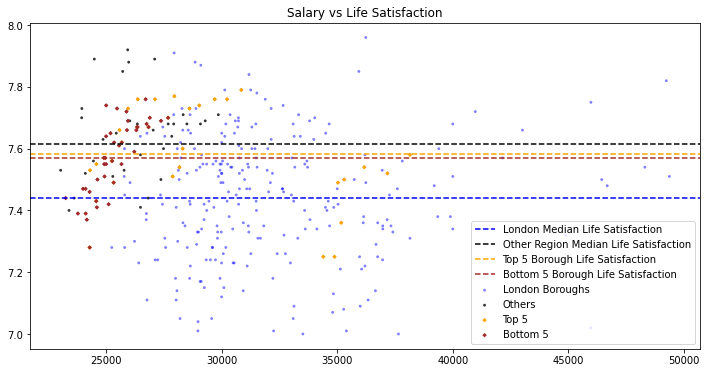

In [7]:
fig = plt.figure(figsize=(12, 6))

## Categorize London related date into same group
london_other = ['inner london','outer london','london']
london = london_borough+london_other
other = [item for item in all_area if item not in london]

## London Boroughs
x1=df_y[df_y['area'].isin(london)]['median_salary']
y1=df_y[df_y['area'].isin(london)]['life_satisfaction']
y1_median=y1.mean()
plt.scatter(x1, y1, color='blue', alpha=0.5, s = 8,  label = 'London Boroughs',edgecolor='none')
plt.axhline(y=y1_median, color='blue', linestyle='--',label='London Median Life Satisfaction')

## Other Data
x2=df_y[df_y['area'].isin(other)]['median_salary']
y2=df_y[df_y['area'].isin(other)]['life_satisfaction']
y2_median=y2.mean()
plt.scatter(x2, y2, color='black', alpha=0.8, s = 8,  label = 'Others',edgecolor='none')
plt.axhline(y=y2_median, color='black', linestyle='--',label='Other Region Median Life Satisfaction')

## Top 5 Boroughs by Salary
x3=df_y[df_y['area'].isin(top_5)]['median_salary']
y3=df_y[df_y['area'].isin(top_5)]['life_satisfaction']
y3_median=y3.mean()
plt.scatter(x3, y3, color='orange', s = 10,  label = 'Top 5',edgecolor='none', marker='D')
plt.axhline(y=y3_median, color='orange', linestyle='--',label='Top 5 Borough Life Satisfaction')

## Bottom 5 Boroughs by Salary
x4=df_y[df_y['area'].isin(bottom_5)]['median_salary']
y4=df_y[df_y['area'].isin(bottom_5)]['life_satisfaction']
y4_median=y4.mean()
plt.scatter(x4, y4, color='brown', s = 10,  label = 'Bottom 5',edgecolor='none', marker='D')
plt.axhline(y=y4_median, color='brown', linestyle='--',label='Bottom 5 Borough Life Satisfaction')

plt.legend()
plt.title('Salary vs Life Satisfaction')

plt.show()

Very interesting. The order of the life satisfaction goes like this:
    
    Other Region > Bottom 5 Boroughs in London in Salary > Greater London > Top 5 Boroughs in London in Salary  
Other region in UK is more satisfied although they earn less. It's not a cliche but a statistical fact that the more people earn the unhappy they are....


## 5. Salary & Life Satisfaction & Numbers of Jobs (Heatmap)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


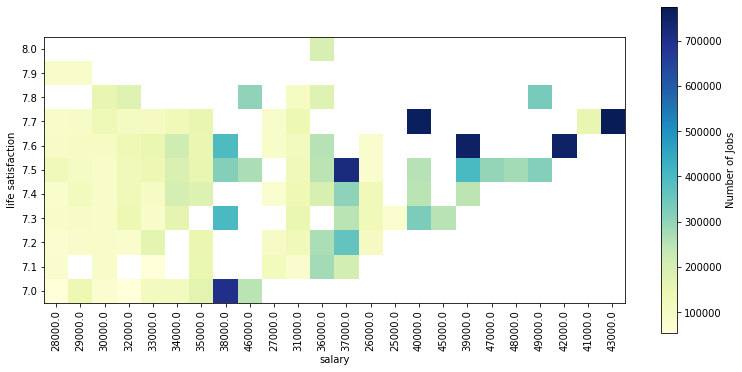

In [8]:
fig = plt.figure(figsize=(13, 6))

# Group median_salary size into 1000 bins and round to nearest 1000
data = df_y[df_y['area'].isin(london_borough)]
data.loc[:,'median_salarygrouped'] = np.round(data['median_salary']/1000) * 1000

# Group life satisfaction into 0.1 bins and round to nearest 0.1
data.loc[:,'life_satisfaction_grouped'] = np.round(data['life_satisfaction'], 1)

# Group median salary by number_of_jobs size and life satisfaction
grouped = data.groupby(['life_satisfaction_grouped','median_salarygrouped'])['number_of_jobs'].median().unstack().sort_values('life_satisfaction_grouped', ascending=False)

# Create heatmap
plt.imshow(grouped, cmap='YlGnBu')
plt.xlabel('salary')
plt.ylabel('life satisfaction')
plt.xticks(range(len(grouped.columns)), grouped.columns, rotation=90)
plt.yticks(range(len(grouped.index)), grouped.index)

# Add colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Number of Jobs')

# Show plot
plt.show()

There are actually more jobs in those areas that tend to have higer salary and life satisfaction!

## 6. Inner London vs Outer London (Pie Chart)

In this section we use **pie chart** to look at some percentage between inner and outer London

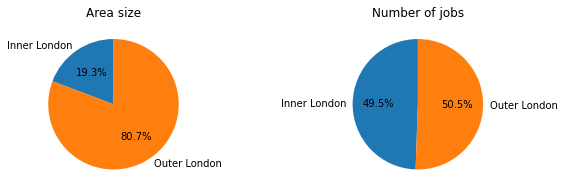

In [9]:
# Create a new column indicating whether the area is in inner or outer London
df_y['location'] = df_y['area'].apply(lambda x: 'Inner London' if x in inner_london_boroughs else 'Outer London')
data = df_y[df_y['area'].isin(london_borough)]

# Create subgroups based on the new column
area_size = data.groupby('location')['area_size'].sum()
pop_size = data.groupby('location')['number_of_jobs'].sum()


# Create the plot with two subplots
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].pie(area_size.values, labels=area_size.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Area size')
axs[1].pie(pop_size.values, labels=pop_size.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Number of jobs')


# Show the plot
plt.show()

Apperently the area of inner London is relatively small but it provides most of the job opportunities. 

# Summary 

### Matplotlib
    Although this dataset primarily contains housing data, I focused my analysis on the median salary data. The main objective of this notebook is to practice creating various charts using Matplotlib to gain a better understanding of their elements, which will provide a solid foundation for using more advanced visualization packages, which a lot of them still are developed upon Matplotlib's structure.

### ChatGPT
    It was an interesting experience as I got to learn about different regions of the UK while practicing plotting with Matplotlib. ChatGPT was incredibly helpful, not only providing me with interesting facts about the regions but also assisting me in debugging and optimizing my code when I encountered issues. I rarely had to resort to searching on Stack Overflow to make my code work. ChatGPT is always able to provide me alternative codes and it truely improve the comprehensiveness of my learning.
    
### My Top 3 Findings
    - United Kingdom != Great Britain
    - People are less satiesfied with higher salaries... surprised?
    - Inner London has a lot of money, even though it's geographically smaller than Outer London
    
Thank you!